# ImageNet

In [1]:
import numpy as np
import argparse
import math
import os
import torch
import torch.optim as optim
import torch.utils.data as data
from torchvision import datasets, transforms
import pickle
# import lasagne
import matplotlib.pyplot as plt

In [2]:
# Functions provided by the website (https://patrykchrabaszcz.github.io/Imagenet32/)

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

def load_databatch(data_folder, idx, img_size=32):
    data_file = os.path.join(data_folder, 'train_data_batch_')

    d = unpickle(data_file + str(idx))
    x = d['data']
    y = d['labels']
    mean_image = d['mean']

    x = x/np.float32(255)
    mean_image = mean_image/np.float32(255)

    # Labels are indexed from 1, shift it so that indexes start at 0
    y = [i-1 for i in y]
    data_size = x.shape[0]

    x -= mean_image

    img_size2 = img_size * img_size

    x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
    x = x.reshape((x.shape[0], img_size, img_size, 3)).transpose(0, 3, 1, 2)

    # create mirrored images
    X_train = x[0:data_size, :, :, :]
    Y_train = y[0:data_size]
    X_train_flip = X_train[:, :, :, ::-1]
    Y_train_flip = Y_train
    X_train = np.concatenate((X_train, X_train_flip), axis=0)
    Y_train = np.concatenate((Y_train, Y_train_flip), axis=0)

    return dict(
        X_train=(X_train), # lasagne.utils.floatX(X_train),
        Y_train=Y_train.astype('int32'),
        mean=mean_image)

In [3]:
d = unpickle('/Users/dj/Desktop/MT_Desktop/ImageNet/ImageNet64/Imagenet64_train/train_data_batch_1')
x = d['data']
y = d['labels']
mean_image = d['mean']

TypeError: object of type 'numpy.float64' has no len()

In [15]:
dat_batch = load_databatch(data_folder = '/Users/dj/Desktop/MT_Desktop/ImageNet/ImageNet64/Imagenet64_train/', idx = 1, img_size=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


152


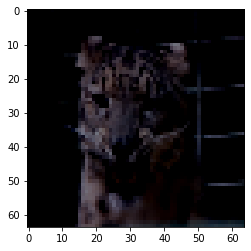

In [19]:
s = 3
image = torch.tensor(dat_batch['X_train'][s]) #34
print(dat_batch['Y_train'][s])
plt.imshow(image.permute(1, 2, 0)  )

# Old 32 

In [5]:
d = unpickle('/Users/dj/Desktop/MT_Desktop/ImageNet/Imagenet32_train/train_data_batch_1')
x = d['data']
y = d['labels']
mean_image = d['mean']

In [6]:
np.mean(mean_image)

114.44612658042962

In [7]:
np.mean(d['data'][100])

211.87434895833334

In [8]:
print(len(x))
print(len(y))
print(len(mean_image))

128116
128116
3072


In [18]:
dat_batch = load_databatch(data_folder = '/Users/dj/Desktop/MT_Desktop/ImageNet/Imagenet32_train', idx = 1, img_size=32)

In [14]:
dat_batch['mean']

array([0.46780166, 0.4746362 , 0.48062865, ..., 0.39663089, 0.39366051,
       0.3904075 ])

In [15]:
len(dat_batch['mean'])

3072

In [16]:
len(dat_batch['X_train'])

256232

In [14]:
len(dat_batch['labels'])

KeyError: 'labels'

In [5]:
dat_batch['X_train']

array([[[[-0.42074284, -0.39620483, -0.31592277, ..., -0.3317078 ,
          -0.33771577, -0.33118692],
         [-0.3774318 , -0.39882377, -0.39234605, ..., -0.31791124,
          -0.3677572 , -0.41314355],
         [-0.39967147, -0.4163355 , -0.40497085, ..., -0.2836042 ,
          -0.30671477, -0.35296118],
         ...,
         [ 0.08698887,  0.11102305,  0.080972  , ...,  0.14018975,
           0.18207209,  0.09511359],
         [ 0.0582254 ,  0.08126317,  0.04230279, ..., -0.04015752,
           0.0301529 ,  0.12508848],
         [ 0.09302691,  0.09918849,  0.01607752, ...,  0.07514559,
           0.02095833, -0.02420355]],

        [[-0.3824169 , -0.37321457, -0.3199217 , ..., -0.42597866,
          -0.4246185 , -0.41054654],
         [-0.35401133, -0.37508577, -0.37980354, ..., -0.33684847,
          -0.37936866, -0.41324323],
         [-0.37140912, -0.3758745 , -0.37165403, ..., -0.29354712,
          -0.31732866, -0.35610023],
         ...,
         [ 0.01213311, -0.02943532

In [6]:
d = load_databatch(data_folder = '/Users/dj/Desktop/MT_Desktop/ImageNet/Imagenet32_train', idx = 1, img_size=32)

In [7]:
type(d)

dict

In [9]:
data_file = os.path.join('/Users/dj/Desktop/MT_Desktop/ImageNet/Imagenet32_train', 'train_data_batch_')

img_size = 32

d = unpickle(data_file + str(1))
x = d['data']
y = d['labels']
mean_image = d['mean']

x = x/np.float32(255)
mean_image = mean_image/np.float32(255)

# Labels are indexed from 1, shift it so that indexes start at 0
y = [i-1 for i in y]
data_size = x.shape[0]

x -= mean_image

img_size2 = img_size * img_size

x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
x = x.reshape((x.shape[0], img_size, img_size, 3)).transpose(0, 3, 1, 2)

In [10]:
x.shape

(128116, 3, 32, 32)

In [11]:
x[0].shape

(3, 32, 32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


152


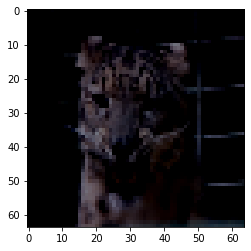

In [18]:
s = 3
image = torch.tensor(dat_batch['X_train'][s]) #34
print(dat_batch['Y_train'][s])
plt.imshow(image.permute(1, 2, 0))

In [13]:
type(x)

numpy.ndarray

# New Approach

In [1]:
import torchvision
from torchvision import datasets, models, transforms

In [2]:
imagenet_data = torchvision.datasets.ImageNet('/Users/dj/Desktop/MT_Desktop/ImageNet/')

RuntimeError: The archive ILSVRC2012_devkit_t12.tar.gz is not present in the root directory or is corrupted. You need to download it externally and place it in /Users/dj/Desktop/MT_Desktop/ImageNet/.